In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
import numbers
from scipy import stats
from math import sin, cos, sqrt, atan2, radians

In [2]:
business_df = pd.read_json('business.json', lines=True)
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   192609 non-null  object 
 1   name          192609 non-null  object 
 2   address       192609 non-null  object 
 3   city          192609 non-null  object 
 4   state         192609 non-null  object 
 5   postal_code   192609 non-null  object 
 6   latitude      192609 non-null  float64
 7   longitude     192609 non-null  float64
 8   stars         192609 non-null  float64
 9   review_count  192609 non-null  int64  
 10  is_open       192609 non-null  int64  
 11  attributes    163773 non-null  object 
 12  categories    192127 non-null  object 
 13  hours         147779 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


# Null Values

In [218]:
# Count nulls in each column
print('Number of NULL values in each column \n')
print(business_df.isnull().sum())

Number of NULL values in each column 

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      28836
categories        482
hours           44830
tip_count           0
chain               0
dtype: int64


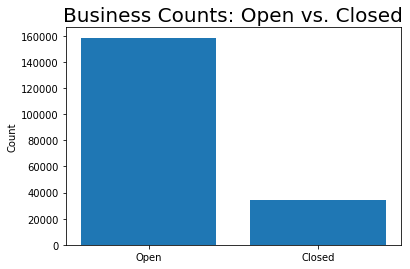

In [216]:
num_open = business_df['is_open'].sum()
num_closed = business_df.shape[0] - num_open

plt.bar(['Open', 'Closed'], [num_open, num_closed])
plt.title('Business Counts: Open vs. Closed', size=20)
plt.ylabel('Count')
plt.show()

# Business Ratings

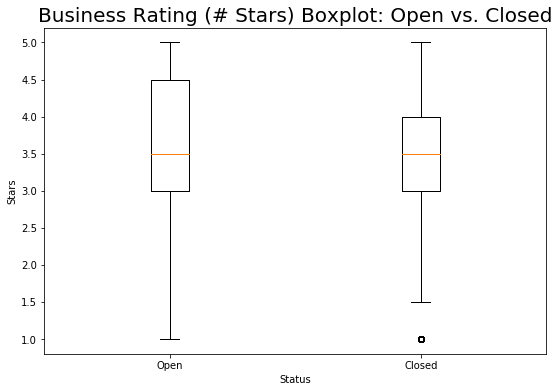

In [214]:
open_stars = business_df[business_df['is_open'] == 1]['stars'].dropna()
closed_stars = business_df[business_df['is_open'] == 0]['stars'].dropna()

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.set_xticklabels(['Open', 'Closed'])

data_to_plot = [open_stars, closed_stars]
bp = ax.boxplot(data_to_plot)
plt.title('Business Rating (# Stars) Boxplot: Open vs. Closed', size=20)
plt.ylabel('Stars')
plt.xlabel('Status')
plt.show()

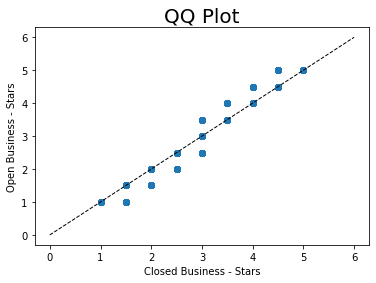

In [212]:
def qqplot(x, y):
    ax = plt.gca()
    quantiles = min(len(x), len(y))

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation='nearest')
    y_quantiles = np.quantile(y, quantiles, interpolation='nearest')

    # Draw the q-q plot
    ax.scatter(x_quantiles, y_quantiles)


# Data
y = open_stars
x = closed_stars

# Generate QQ plot
a = [x for x in range(7)]
plt.figure()
plt.plot(a, a, "k--", linewidth=1)
qqplot(x, y)
plt.title('QQ Plot', size=20)
plt.xlabel('Closed Business - Stars')
plt.ylabel('Open Business - Stars')
plt.show()

# Tip Counts

In [20]:
tip_df = pd.read_json('tip.json', lines=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223094 entries, 0 to 1223093
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_id           1223094 non-null  object        
 1   business_id       1223094 non-null  object        
 2   text              1223094 non-null  object        
 3   date              1223094 non-null  datetime64[ns]
 4   compliment_count  1223094 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.7+ MB


In [28]:
bzn_tips = {}
for index, tip in tip_df.iterrows():
    business_id = tip['business_id']
    if business_id in bzn_tips:
        bzn_tips[business_id] += 1
    else:
        bzn_tips[business_id] = 1


In [220]:
# Add a 'tip_count' column to businesses_df dataframe
business_df['tip_count'] = 0

for index, business in business_df.iterrows():
    business_id = business['business_id']
    if business_id in bzn_tips:
        business_df.at[index, 'tip_count'] = bzn_tips[business_id]

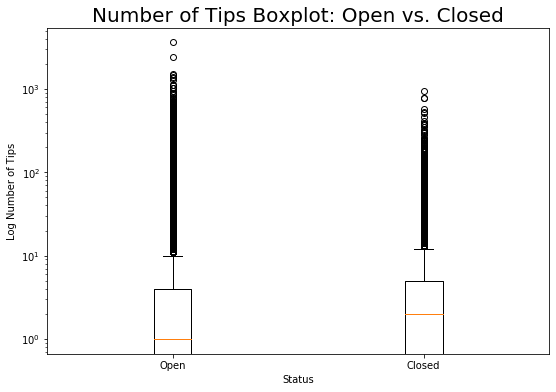

In [219]:
open_tips = business_df[business_df['is_open'] == 1]['tip_count'].dropna()
closed_tips = business_df[business_df['is_open'] == 0]['tip_count'].dropna()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Open', 'Closed'])

data_to_plot = [open_tips, closed_tips]
bp = ax.boxplot(data_to_plot)
plt.yscale('log')
plt.title('Number of Tips Boxplot: Open vs. Closed', size=20)
plt.ylabel('Log Number of Tips')
plt.xlabel('Status')
plt.show()

# Review Count

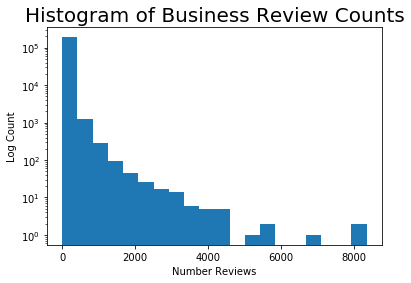

In [211]:

plt.hist(business_df['review_count'], bins=20)
plt.yscale('log')
plt.title('Histogram of Business Review Counts', size=20)
plt.ylabel('Log Count')
plt.xlabel('Number Reviews')
plt.show()

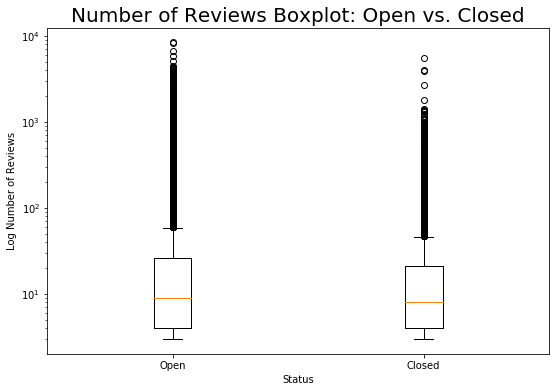

In [302]:
open_reviews = business_df[business_df['is_open'] == 1]['review_count'].dropna()
closed_reviews = business_df[business_df['is_open'] == 0]['review_count'].dropna()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Open', 'Closed'])

data_to_plot = [open_reviews, closed_reviews]
bp = ax.boxplot(data_to_plot)
plt.yscale('log')
plt.title('Number of Reviews Boxplot: Open vs. Closed', size=20)
plt.ylabel('Log Number of Reviews')
plt.xlabel('Status')
plt.show()

In [301]:
# t-test for mean of 'is_open', review counts
open = business_df[business_df['is_open'] == 1]['review_count'].tolist()
not_open = business_df[business_df['is_open'] == 0]['review_count'].tolist()

print('T-test for mean of is_open, review_count: \n')
print(stats.ttest_ind(open, not_open, equal_var=False))

T-test for mean of is_open, review_count: 

Ttest_indResult(statistic=22.62995304885294, pvalue=5.106770536680459e-113)


# Chain vs. Non-Chain Businesses

- Chain if business appears more than once in the dataset

In [63]:
# Create a dictionary where key=business_name, value=count of that business
business_names = {}
for index, tip in business_df.iterrows():
    business_name = tip['name']
    if business_name in business_names:
        business_names[business_name] += 1
    else:
        business_names[business_name] = 1

# Add a Boolean column 'chain' to business_df
# True if there are more than one business by the same name
business_df['chain'] = False
for index, business in business_df.iterrows():
    business_name = business['name']
    if business_names[business_name] > 1:
        business_df.at[index, 'chain'] = True

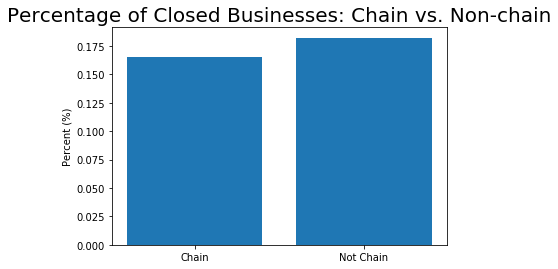

In [197]:
num_chain = business_df['chain'].sum()
num_notchain = business_df.shape[0] - num_chain

open_chain = business_df[(business_df['chain'] == True) & (business_df['is_open'] == 1)].shape[0] / num_chain
closed_chain = business_df[(business_df['chain'] == True) & (business_df['is_open'] == 0)].shape[0] / num_chain
open_notchain = business_df[(business_df['chain'] == False) & (business_df['is_open'] == 1)].shape[0] / num_notchain
closed_notchain = business_df[(business_df['chain'] == False) & (business_df['is_open'] == 0)].shape[0] / num_notchain

labels = ['Chain', 'Not Chain']
data = [closed_chain, closed_notchain]
plt.bar(labels, data)
plt.ylabel('Percent (%)')
plt.title('Percentage of Closed Businesses: Chain vs. Non-chain', size=20)
plt.show()

In [210]:
# t-test for mean of 'is_open', chain vs. non-chain businesses
chains = business_df[business_df['chain'] == True]['is_open'].tolist()
not_chains = business_df[business_df['chain'] == False]['is_open'].tolist()

print('T-test for mean of is_open, chain vs. non-chain businesses: \n')
print(stats.ttest_ind(chains, not_chains, equal_var=False))

T-test for mean of is_open, chain vs. non-chain businesses: 

Ttest_indResult(statistic=9.189674120256974, pvalue=4.00229660217817e-20)


# Restaurant Density for IL Businesses

- Analyzing the number of nearby restaurants - within 0.1 and 0.3 km - calculated using lat & long columns

In [284]:
def get_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance




bus_loc = [[] for i in range(illinois_business.shape[0])]
count = 0
for index, row in illinois_business.iterrows():
    bus_loc[count].append(row['business_id'])
    bus_loc[count].append(row['latitude'])
    bus_loc[count].append(row['longitude'])
    count += 1
    
il_neighbors_close = [[] for i in range(len(bus_loc))]
il_neighbors_far = [[] for i in range(len(bus_loc))]

for i, biz1 in enumerate(bus_loc):
    for j, biz2 in enumerate(bus_loc):
        if i == j:
            continue
        distance = get_distance(biz1[1], biz1[2], biz2[1], biz2[2])
        if distance < 0.3:
            il_neighbors_far[i].append([biz2[0], distance])
        if distance < 0.1:
            il_neighbors_close[i].append([biz2[0], distance])
            

illinois_business['neighbors_close'] = il_neighbors_close
illinois_business['neighbors_far'] = il_neighbors_far

number_neighbors_close = [0 for i in range(len(il_neighbors_close))]
number_neighbors_far = [0 for i in range(len(il_neighbors_far))]


for i, bzn in enumerate(il_neighbors_close):
    number_neighbors_close[i] = len(bzn)
    
for i, bzn in enumerate(il_neighbors_far):
    number_neighbors_far[i] = len(bzn)

/Users/David/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/David/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


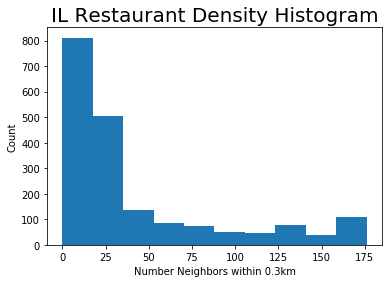

In [285]:
plt.hist(number_neighbors_far, bins=10)
plt.title('IL Restaurant Density Histogram', size=20)
plt.xlabel('Number Neighbors within 0.3km')
plt.ylabel('Count')
plt.show()

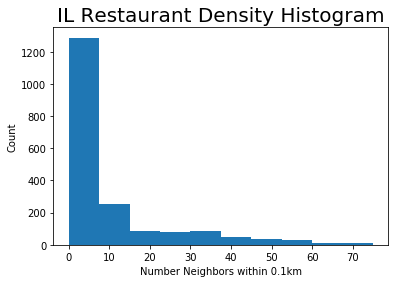

In [286]:
plt.hist(number_neighbors_close, bins=10)
plt.title('IL Restaurant Density Histogram', size=20)
plt.xlabel('Number Neighbors within 0.1km')
plt.ylabel('Count')
plt.show()

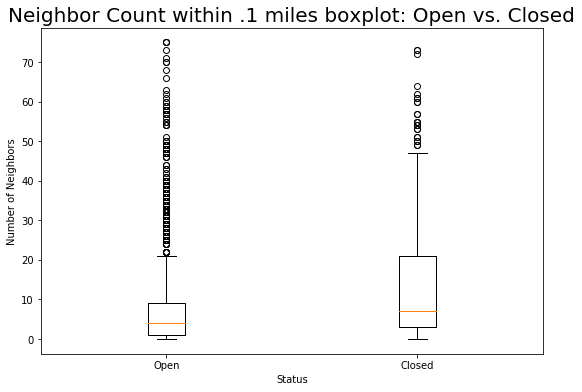

In [291]:
open_neighbors_close = illinois_business[illinois_business['is_open'] == 1]['neighbors_close'].dropna().apply(lambda x: len(x))
closed_neighbors_close = illinois_business[illinois_business['is_open'] == 0]['neighbors_close'].dropna().apply(lambda x: len(x))

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Open', 'Closed'])

data_to_plot = [open_neighbors_close, closed_neighbors_close]
bp = ax.boxplot(data_to_plot)
plt.title('Neighbor Count within .1 miles boxplot: Open vs. Closed', size=20)
plt.ylabel('Number of Neighbors')
plt.xlabel('Status')
plt.show()

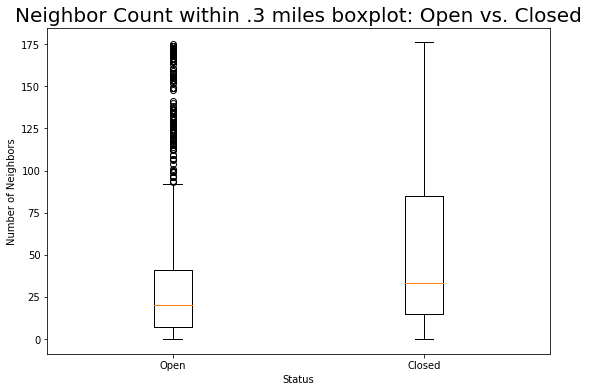

In [290]:
open_neighbors_far = illinois_business[illinois_business['is_open'] == 1]['neighbors_far'].dropna().apply(lambda x: len(x))
closed_neighbors_far = illinois_business[illinois_business['is_open'] == 0]['neighbors_far'].dropna().apply(lambda x: len(x))

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Open', 'Closed'])

data_to_plot = [open_neighbors_far, closed_neighbors_far]
bp = ax.boxplot(data_to_plot)
plt.title('Neighbor Count within .3 miles boxplot: Open vs. Closed', size=20)
plt.ylabel('Number of Neighbors')
plt.xlabel('Status')
plt.show()

In [292]:

print('T-test for mean of number neighbors count within .1 miles, open/closed \n')
print(stats.ttest_ind(open_neighbors_close, closed_neighbors_close, equal_var=False))

T-test for mean of number neighbors count within .1 miles, open/closed 

Ttest_indResult(statistic=-6.171895936690319, pvalue=1.356979438020407e-09)


In [293]:

print('T-test for mean of number neighbors count within .3 miles, open/closed \n')
print(stats.ttest_ind(open_neighbors_far, closed_neighbors_far, equal_var=False))

T-test for mean of number neighbors count within .3 miles, open/closed 

Ttest_indResult(statistic=-5.796811874484988, pvalue=1.1498704434355796e-08)


# Reviews vs. Tips

In [235]:
color = business_df['is_open'].tolist()
reviews = business_df['review_count'].tolist()
tips = business_df['tip_count'].tolist()


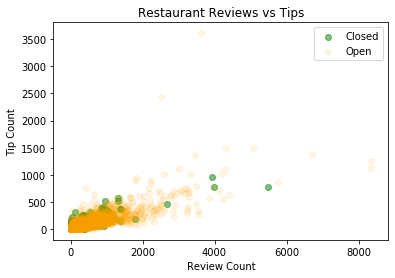

In [298]:
fig, ax = plt.subplots()
labels = ['Closed', 'Open']
a = [0.5, 0.1]

for i, color in enumerate(['green', 'orange']):
    reviews = business_df[business_df['is_open'] == i]['review_count'].tolist()
    tips = business_df[business_df['is_open'] == i]['tip_count'].tolist()
    ax.scatter(reviews, tips, c=color, label=labels[i], alpha=a[i])
    
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Review Count')
plt.ylabel('Tip Count')
plt.title('Restaurant Reviews vs Tips')    
ax.legend()
plt.show()